## Cats and dogs - Deep Learning Tutorial

![](catsDogs.gif)


### [Tutorial by Dipanjan Sarkar](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)

### Load data and reshape dims

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

IMG_DIM = (150, 150)

train_files = glob.glob('dataset/trainingData/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('dataset/validationData/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape,
      '\tValidation dataset shape:', validation_imgs.shape)

Using TensorFlow backend.


Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


### Rescale 8-bit pixels between (0, 1)

(150, 150, 3)


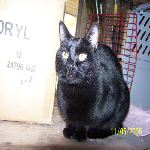

In [2]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

### Set hyperparams and encode text class labels to numeric

In [3]:
batch_size = 30
num_classes = 2
epochs = 8
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


### CNN model

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flat

### Train and validate

In [5]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 3000 samples, validate on 1000 samples
Epoch 1/8
3000/3000 [==============================] - 52s 17ms/step - loss: 0.8525 - acc: 0.5507 - val_loss: 0.6936 - val_acc: 0.5110
Epoch 2/8
3000/3000 [==============================] - 50s 17ms/step - loss: 0.6358 - acc: 0.6500 - val_loss: 0.5638 - val_acc: 0.7070
Epoch 3/8
3000/3000 [==============================] - 49s 16ms/step - loss: 0.5533 - acc: 0.7220 - val_loss: 0.5516 - val_acc: 0.7010
Epoch 4/8
3000/3000 [==============================] - 49s 16ms/step - loss: 0.4725 - acc: 0.7687 - val_loss: 0.6240 - val_acc: 0.6980
Epoch 5/8
3000/3000 [==============================] - 50s 17ms/step - loss: 0.3888 - acc: 0.8223 - val_loss: 0.5625 - val_acc: 0.7450
Epoch 6/8
3000/3000 [==============================] - 50s 17ms/step - loss: 0.2892 - acc: 0.8770 - val_loss: 0.5635 - val_acc: 0.7330
Epoch 7/8
3000/3000 [==============================] - 51s 17ms/step - loss: 0.2233 - acc: 0.9

### Plot model accuracy and errors

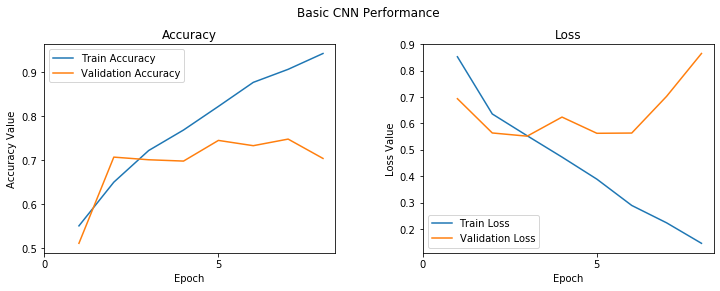

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

### (1) CNN Model with regularization

In [7]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
___________________________

In [8]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/8
3000/3000 [==============================] - 48s 16ms/step - loss: 0.7794 - acc: 0.5213 - val_loss: 0.6734 - val_acc: 0.5960
Epoch 2/8
3000/3000 [==============================] - 48s 16ms/step - loss: 0.6770 - acc: 0.5853 - val_loss: 0.6624 - val_acc: 0.6010
Epoch 3/8
3000/3000 [==============================] - 48s 16ms/step - loss: 0.6756 - acc: 0.5923 - val_loss: 0.6637 - val_acc: 0.6460
Epoch 4/8
3000/3000 [==============================] - 46s 15ms/step - loss: 0.6487 - acc: 0.6610 - val_loss: 0.6918 - val_acc: 0.5950
Epoch 5/8
3000/3000 [==============================] - 49s 16ms/step - loss: 0.5848 - acc: 0.6960 - val_loss: 0.5831 - val_acc: 0.6780
Epoch 6/8
3000/3000 [==============================] - 51s 17ms/step - loss: 0.5315 - acc: 0.7430 - val_loss: 0.5773 - val_acc: 0.7100
Epoch 7/8
3000/3000 [==============================] - 48s 16ms/step - loss: 0.4798 - acc: 0.7700 - val_loss: 0.5055 - val_acc: 0.7590
Epoch 8

### Save the model

In [9]:
model.save('cats_dogs_basic_cnn.h5')

### (2) CNN Model with Image Augmentation

Image augmentation with Keras `ImageDataGenerator`.

*Only on train data*

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

#### Visualize ImageDataGenerator

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


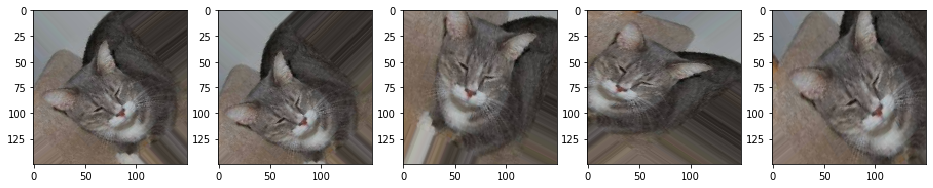

In [11]:
img_id = 50
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]

fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

#### Use same model architecture with the new data generators

In [20]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)

Epoch 1/20
100/100 [==============================] - 50s 503ms/step - loss: 0.6942 - acc: 0.5157 - val_loss: 0.6886 - val_acc: 0.6060
Epoch 2/20
100/100 [==============================] - 49s 488ms/step - loss: 0.6890 - acc: 0.5347 - val_loss: 0.6809 - val_acc: 0.5510
Epoch 3/20
100/100 [==============================] - 48s 479ms/step - loss: 0.6711 - acc: 0.5867 - val_loss: 0.6565 - val_acc: 0.5960
Epoch 4/20
100/100 [==============================] - 48s 479ms/step - loss: 0.6597 - acc: 0.6077 - val_loss: 0.6590 - val_acc: 0.5910
Epoch 5/20
100/100 [==============================] - 49s 490ms/step - loss: 0.6477 - acc: 0.6053 - val_loss: 0.6331 - val_acc: 0.6430
Epoch 6/20
100/100 [==============================] - 53s 532ms/step - loss: 0.6348 - acc: 0.6297 - val_loss: 0.6264 - val_acc: 0.6500
Epoch 7/20
100/100 [==============================] - 51s 509ms/step - loss: 0.6290 - acc: 0.6460 - val_loss: 0.6574 - val_acc: 0.6190
Epoch 8/20
100/100 [==============================] - 5

Train generator generates 30 images each time (see line 1 above)

100 steps per epoch means 3000 random images for each epoch. 

Val generator generates 20 images. 50 steps means 1000 val images.

(No augmentation on validation data)

Defaults:  epochs = 100 (goes to around 82 % val_acc) 

#### Plot performance and save the model

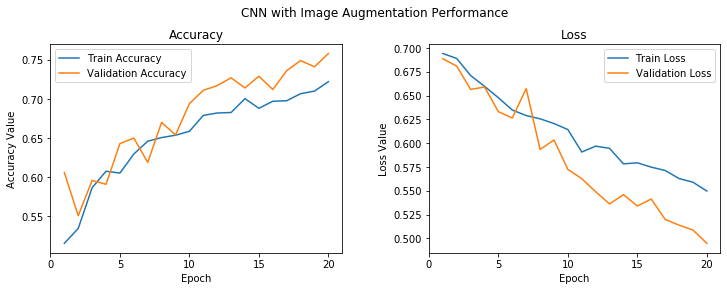

In [22]:
epochs = 20
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [23]:
model.save('cats_dogs_cnn_img_aug.h5')

## Transfer Learning with pre-trained CNN Models
## VGG-16
As (1) a feature extractor (all Conv layers frozen) and as (2) a fine-tuned model (last 2 blocks open to learning)

![](vgg16arch.png)
![](vgg16schema.png)

### (3) Pre-trained CNN Model as a Feature Extractor
Load the model and freeze the convolution blocks

In [24]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x0000021FA038B4A8>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x0000021FA0379D30>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x0000021FA0379D68>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x0000021FA0371908>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x0000021FA0371CF8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x0000021FA03D16A0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x0000021FA03E7B70>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x0000021FA03E7898>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x0000021FA041D828>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x0000021FA0432B00>,block3_conv3,False


#### Visualize one bottleneck feature (out of 512) for a sample image

(1, 4, 4, 512)


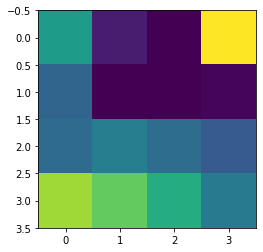

In [25]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

#### Extract out the bottleneck features (flattened) from our training and validation sets
CAREFUL: long computation time (around 15min)

In [26]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


#### Build the CNN architecture that will take these features as input
Which means we only build the Dense FC layers to regress these features (8192). 

In [27]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


#### Train the model (FC layers)

In [28]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4175 - acc: 0.7927 - val_loss: 0.4082 - val_acc: 0.8170
Epoch 2/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2885 - acc: 0.8763 - val_loss: 0.2875 - val_acc: 0.8820
Epoch 3/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2348 - acc: 0.9057 - val_loss: 0.2815 - val_acc: 0.8850
Epoch 4/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2096 - acc: 0.9147 - val_loss: 0.2768 - val_acc: 0.8840
Epoch 5/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1707 - acc: 0.9320 - val_loss: 0.2795 - val_acc: 0.8880
Epoch 6/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1473 - acc: 0.9417 - val_loss: 0.2716 - val_acc: 0.8950
Epoch 7/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1264 - acc: 0.9510 - val_loss: 0.3187 - val_acc: 0.8840
Epoch 8/30
300

#### Plot performance and save the model

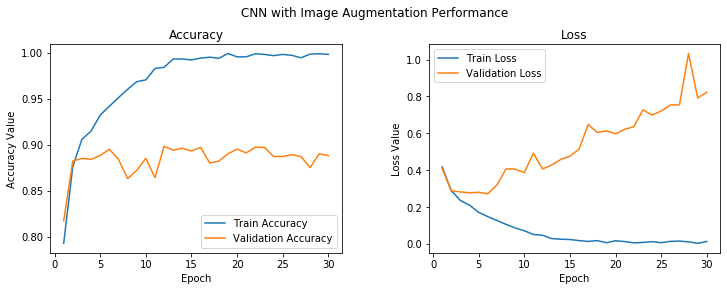

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [30]:
model.save('cats_dogs_tlearn_basic_cnn.h5')

### (4) Pre-trained CNN Model as a Feature Extractor with Image Augmentation

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

#### Pass the VGG Model instead of extracting the bottleneck features since we are now working with generators (random and not constant)

#### Takes around 10 min per epoch. 

#### Performance around 90%

In [50]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history_4 = model.fit_generator(train_generator, steps_per_epoch=100, epochs=12,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)

Epoch 1/12
100/100 [==============================] - 678s 7s/step - loss: 0.6599 - acc: 0.6043 - val_loss: 0.5117 - val_acc: 0.8160
Epoch 2/12
100/100 [==============================] - 638s 6s/step - loss: 0.5608 - acc: 0.7170 - val_loss: 0.4198 - val_acc: 0.8270
Epoch 3/12
100/100 [==============================] - 624s 6s/step - loss: 0.5138 - acc: 0.7443 - val_loss: 0.3813 - val_acc: 0.8450
Epoch 4/12
100/100 [==============================] - 623s 6s/step - loss: 0.4771 - acc: 0.7737 - val_loss: 0.3371 - val_acc: 0.8650
Epoch 5/12
100/100 [==============================] - 628s 6s/step - loss: 0.4513 - acc: 0.7867 - val_loss: 0.3355 - val_acc: 0.8590
Epoch 6/12
100/100 [==============================] - 620s 6s/step - loss: 0.4399 - acc: 0.7917 - val_loss: 0.3100 - val_acc: 0.8800
Epoch 7/12
100/100 [==============================] - 628s 6s/step - loss: 0.4253 - acc: 0.8057 - val_loss: 0.2923 - val_acc: 0.8790
Epoch 8/12
100/100 [==============================] - 633s 6s/step - 

In [51]:
model.save('cats_dogs_tlearn_img_aug_cnn_.h5')

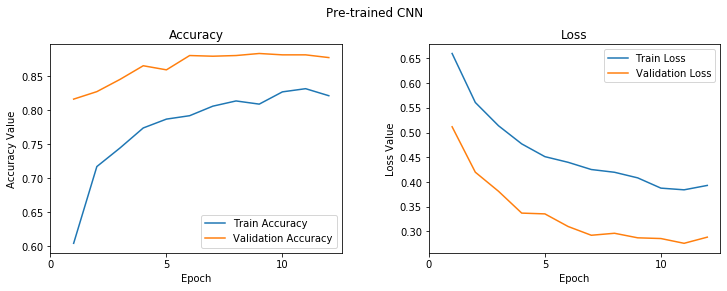

In [52]:
def plotLearningHistory(history, title="Learning History"):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle(title, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epochs = len(history.history['acc'])
    epoch_list = list(range(1,epochs+1))
    ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epochs+1, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epochs+1, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

    
plotLearningHistory(history_4, title='Pre-trained CNN')

In [ ]:
"""
Epoch 1/20
100/100 [==============================] - 634s 6s/step - loss: 0.6458 - acc: 0.6237 - val_loss: 0.5164 - val_acc: 0.7520
Epoch 2/20
100/100 [==============================] - 621s 6s/step - loss: 0.5599 - acc: 0.7190 - val_loss: 0.4058 - val_acc: 0.8300
Epoch 3/20
100/100 [==============================] - 629s 6s/step - loss: 0.5001 - acc: 0.7610 - val_loss: 0.3576 - val_acc: 0.8410
Epoch 4/20
100/100 [==============================] - 628s 6s/step - loss: 0.4711 - acc: 0.7783 - val_loss: 0.3422 - val_acc: 0.8490
Epoch 5/20
100/100 [==============================] - 634s 6s/step - loss: 0.4415 - acc: 0.7950 - val_loss: 0.3241 - val_acc: 0.8520
Epoch 6/20
100/100 [==============================] - 630s 6s/step - loss: 0.4317 - acc: 0.7910 - val_loss: 0.2949 - val_acc: 0.8740
Epoch 7/20
100/100 [==============================] - 627s 6s/step - loss: 0.4285 - acc: 0.8020 - val_loss: 0.2950 - val_acc: 0.8790
Epoch 8/20
100/100 [==============================] - 650s 6s/step - loss: 0.3885 - acc: 0.8253 - val_loss: 0.2923 - val_acc: 0.8750
Epoch 9/20
100/100 [==============================] - 678s 7s/step - loss: 0.3811 - acc: 0.8240 - val_loss: 0.2788 - val_acc: 0.8780
Epoch 10/20
100/100 [==============================] - 654s 7s/step - loss: 0.3928 - acc: 0.8290 - val_loss: 0.2953 - val_acc: 0.8660
Epoch 11/20
100/100 [==============================] - 668s 7s/step - loss: 0.3911 - acc: 0.8230 - val_loss: 0.2970 - val_acc: 0.8820
Epoch 12/20
100/100 [==============================] - 668s 7s/step - loss: 0.3770 - acc: 0.8303 - val_loss: 0.2711 - val_acc: 0.8910
Epoch 13/20
100/100 [==============================] - 697s 7s/step - loss: 0.3748 - acc: 0.8313 - val_loss: 0.2672 - val_acc: 0.8860
Epoch 14/20
100/100 [==============================] - 675s 7s/step - loss: 0.3661 - acc: 0.8400 - val_loss: 0.2744 - val_acc: 0.8930
Epoch 15/20
100/100 [==============================] - 700s 7s/step - loss: 0.3535 - acc: 0.8427 - val_loss: 0.2847 - val_acc: 0.8720
Epoch 16/20
100/100 [==============================] - 654s 7s/step - loss: 0.3740 - acc: 0.8360 - val_loss: 0.2657 - val_acc: 0.8970
Epoch 17/20
100/100 [==============================] - 638s 6s/step - loss: 0.3554 - acc: 0.8397 - val_loss: 0.2614 - val_acc: 0.8880
Epoch 18/20
100/100 [==============================] - 630s 6s/step - loss: 0.3559 - acc: 0.8357 - val_loss: 0.2758 - val_acc: 0.8790
Epoch 19/20
100/100 [==============================] - 613s 6s/step - loss: 0.3438 - acc: 0.8483 - val_loss: 0.2713 - val_acc: 0.8860
Epoch 20/20
100/100 [==============================] - 612s 6s/step - loss: 0.3676 - acc: 0.8307 - val_loss: 0.2853 - val_acc: 0.8790
"""

### (5) Pre-trained CNN Model with Fine-tuning and Image Augmentation

Unfreeze convolutional block 4 and 5

In [35]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x0000021FA038B4A8>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x0000021FA0379D30>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x0000021FA0379D68>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x0000021FA0371908>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x0000021FA0371CF8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x0000021FA03D16A0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x0000021FA03E7B70>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x0000021FA03E7898>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x0000021FA041D828>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x0000021FA0432B00>,block3_conv3,False


#### Using same model architecture and data generators as last model

#### *Not running* since it takes around 10min per epoch. 

#### Performance around 96% val_acc

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)

Epoch 1/20
100/100 [==============================] - 877s 9s/step - loss: 0.5856 - acc: 0.6693 - val_loss: 0.3467 - val_acc: 0.8530
Epoch 2/20
100/100 [==============================] - 869s 9s/step - loss: 0.4053 - acc: 0.8167 - val_loss: 0.2372 - val_acc: 0.9050
Epoch 3/20
100/100 [==============================] - 871s 9s/step - loss: 0.3348 - acc: 0.8560 - val_loss: 0.3198 - val_acc: 0.8800
Epoch 4/20
100/100 [==============================] - 844s 8s/step - loss: 0.2873 - acc: 0.8847 - val_loss: 0.1785 - val_acc: 0.9350
Epoch 5/20
100/100 [==============================] - 844s 8s/step - loss: 0.2532 - acc: 0.8967 - val_loss: 0.1652 - val_acc: 0.9370
Epoch 6/20
100/100 [==============================] - 837s 8s/step - loss: 0.2309 - acc: 0.9000 - val_loss: 0.2342 - val_acc: 0.9150
Epoch 7/20
100/100 [==============================] - 834s 8s/step - loss: 0.2135 - acc: 0.9090 - val_loss: 0.2313 - val_acc: 0.9170
Epoch 8/20
100/100 [==============================] - 845s 8s/step - 

In [37]:
model.save('cats_dogs_tlearn_finetune_img_aug_cnn.h5')

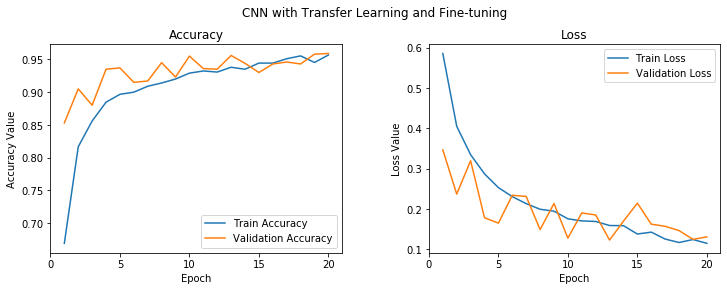

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN with fine-tuning', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = len(history.history['acc'])
epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## Evaluating the Models on Test Data
*The Models were not trained properly because of a lack of computation power*. But the idea is here.

Using `model_evaluation_utils` from Dipanjan Sarkar

In [44]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
import model_evaluation_utils as meu
%matplotlib inline

# load saved models
basic_cnn = load_model('cats_dogs_basic_cnn.h5')
img_aug_cnn = load_model('cats_dogs_cnn_img_aug.h5')
tl_cnn = load_model('cats_dogs_tlearn_basic_cnn.h5')
tl_img_aug_cnn = load_model('cats_dogs_tlearn_img_aug_cnn.h5')
tl_img_aug_finetune_cnn = load_model('cats_dogs_tlearn_finetune_img_aug_cnn.h5')

# load other configurations
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

# load VGG model for bottleneck features
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                  input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

#### Prepare Test Data

In [45]:
IMG_DIM = (150, 150)

test_files = glob.glob('dataset/testData/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (1000, 150, 150, 3)
['cat', 'cat', 'cat', 'cat', 'cat'] [0, 0, 0, 0, 0]


### Model 1: Basic CNN Performance

In [40]:
predictions = basic_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.746
Precision: 0.7521
Recall: 0.746
F1 Score: 0.7444

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.71      0.82      0.76       500
         dog       0.79      0.67      0.72       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.74      1000
weighted avg       0.75      0.75      0.74      1000


Prediction Confusion Matrix:
------------------------------


D:\MonteaCristo\Documents\Github\CERVO\TrivialML\tutorial\catdogML\model_evaluation_utils.py:62: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
D:\MonteaCristo\Documents\Github\CERVO\TrivialML\tutorial\catdogML\model_evaluation_utils.py:64: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


            Predicted:     
                   cat  dog
Actual: cat  412        88 
        dog  166        334


### Model 2: Basic CNN with Image Augmentation Performance

In [41]:
predictions = img_aug_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.736
Precision: 0.7392
Recall: 0.736
F1 Score: 0.7351

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.77      0.68      0.72       500
         dog       0.71      0.79      0.75       500

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  339        161
        dog  103        397


### Model 3:  Pre-trained CNN as a Feature Extractor Performance

In [42]:
test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)

predictions = tl_cnn.predict_classes(test_bottleneck_features, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.888
Precision: 0.888
Recall: 0.888
F1 Score: 0.888

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.88      0.89      0.89       500
         dog       0.89      0.88      0.89       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  446        54 
        dog  58         442


### Model 4: Pre-trained CNN as a Feature Extractor with Image Augmentation Performance

In [46]:
predictions = tl_img_aug_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.875
Precision: 0.8793
Recall: 0.875
F1 Score: 0.8746

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.92      0.82      0.87       500
         dog       0.84      0.93      0.88       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.87      1000
weighted avg       0.88      0.88      0.87      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  411        89 
        dog  36         464


### Model 5: Pre-trained CNN with Fine-tuning and Image Augmentation Performance

In [47]:
predictions = tl_img_aug_finetune_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.954
Precision: 0.9543
Recall: 0.954
F1 Score: 0.954

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.97      0.94      0.95       500
         dog       0.94      0.97      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  471        29 
        dog  17         483


#### Not evaluating model 4 and 5 since they were not trained

**Typical Test Accuracy: **

Model 1: 77.6 %

Model 2: 84.4 %

Model 3: 88.8 %

Model 4: 89.8 %

Model 5: 96.1 %

#### Plot ROC Curves of model 1 and 2

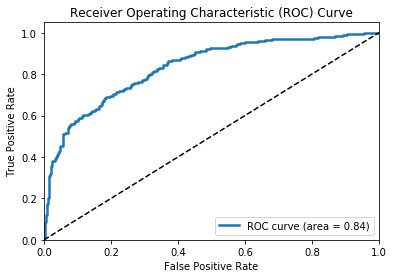

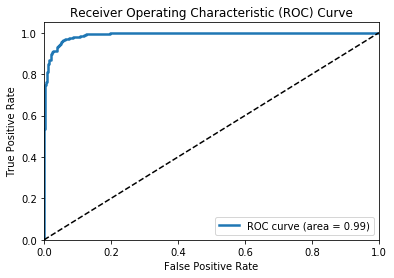

In [48]:
# worst model - basic CNN 
meu.plot_model_roc_curve(basic_cnn, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1]) 

# best model - transfer learning with fine-tuning & image augmentation 
meu.plot_model_roc_curve(tl_img_aug_finetune_cnn, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1])